# <center>Visualizing and Munging Stock Data</center>

In this notebook, we will go through the basics of Python, which are related to statistical analysis of financial data. First, we will show how to read a stock data from data files using DataFrame. Next, we'll use this data to explore basic methods and attributes of DataFrame. In practice, it is always necessary to generate and transform original variables into other forms. For example, we need get stock return from stock price. Therefore, in the next step, we will generate new variables from our original variables. Finally, we will present more advanced workflow using DataFrame to implement a trend following strategy of stock trading.

## <center>Importing data</center>

The very first step of financial data analysis is to get data. One of the popular format for storing data is CSV file. We have to import pandas in the notebook before we use any functions or data structure from pandas.Now, we want to import two data files, facebook.csv and microsoft.csv.These are historical stock data of Facebook and Microsoft. 

In [14]:
#import the packages "Pandas" and "MatPlotLib" into Jupyter Notebook
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Import the stock data of Facebook and Microsoft.
# We will use the column 'Date' as index so we can make queries based on that, 
# which essential when working with TimeSeries
fb = pd.read_csv('data/facebook.csv', index_col='Date') 
ms = pd.read_csv('data/microsoft.csv', index_col='Date')

By looking at this output, the historical data of Facebook and Microsoft have been successfully imported as a DataFrame. 

## <center>Basics of DataFrame</center>
In this part, we will present basic attributes and methods of DataFrame, which we will use a lot in data analysis.

To begin with, let's first take a look at what DataFrames looks like. 

In [18]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [19]:
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


As we can see, Pandas DataFrame is a tabular structure of data. It has rows and columns. There is an index, which gives a base for each row. There are columns of open, high, low, adjust close, and volume. Open and close are the opening price and the closing price. High and low are the highest in price and the lowest price. Adjust close is a stock closing price, on a given day of trading that has been amended to include any dispution and the corporate actions occurred at anytime before the next day's open. 

Every data type in Python had its own methods and attributes. As the example of attributes, we can check index like this:

In [21]:
fb.index # list of indices of the DataFrame

Index(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
       '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
       ...
       '2018-01-23', '2018-01-24', '2018-01-25', '2018-01-26', '2018-01-29',
       '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05'],
      dtype='object', name='Date', length=780)

In [22]:
fb.index[0] # the first index

'2014-12-31'

In [24]:
fb.index[-1] # the last index

'2018-02-05'

Similarly, in order to get a list with the names of columns:

In [25]:
fb.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

The size of a DataFrame is given by:

In [26]:
fb.shape

(780, 6)

The size of a DataFrame is tuple, with the first number indicating the number of rows and the second the number of columns

Head and tail are often used to check whether data is correct or to check contents of index and columns. With tail, you can get the last five rows. In fact, you can specify how many rows you want by putting number of rows inside the parentheses.

In [28]:
fb.head() # return first 5 rows by default

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [29]:
fb.head(10) # return first 10 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200
2015-01-08,19.360001,19.980000,19.350000,19.860001,19.274870,7094500
2015-01-09,19.930000,20.090000,19.660000,19.940001,19.352512,5238500
2015-01-12,19.990000,20.000000,19.510000,19.690001,19.109879,4768300
2015-01-13,19.840000,20.240000,19.520000,19.660000,19.080761,5909700


In [30]:
fb.tail() # return last 5 rows by default

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000


In [31]:
fb.tail(10) # return last 10 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-23,235.850006,239.830002,235.100006,238.910004,238.910004,11880700
2018-01-24,239.039993,240.490005,233.550003,235.800003,235.800003,14499300
2018-01-25,238.000000,239.750000,235.750000,236.350006,236.350006,10247100
2018-01-26,238.119995,243.339996,237.600006,243.330002,243.330002,12908900
2018-01-29,242.740005,248.110001,240.610001,246.850006,246.850006,11377900
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600


There is another method called describe, which can give you some summary statistics for each column.

In [32]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,80.212705,81.285654,79.022397,80.264897,79.914215,1.204453e+07
std,64.226121,65.048907,63.190963,64.198375,64.327846,8.221848e+06
min,19.250000,19.500000,18.940001,19.139999,18.576082,1.311200e+06
25%,25.525000,26.085000,24.845000,25.475000,25.134513,7.215200e+06
50%,53.379999,54.034999,52.930000,53.420000,53.035403,9.728700e+06
75%,113.322502,115.779999,110.297499,113.702501,113.261238,1.408885e+07
max,245.770004,249.270004,244.449997,246.850006,246.850006,9.232320e+07


For example, in this output which is also the format of DataFrame, the first column lists number mean standard deviation etc., for open price.

Sometimes we only need a subset data. For example, we can select only close price of 2015. There are two ways to slice a DataFrame, selection by label and selection by position. For example, if we want the close price on the first day of 2015, you can use a method loc along with labels of index and the column. The first entry is the index label. The second entry of label is a column name. 

In [33]:
fb.loc['2015-01-02', 'Close']

20.129999

Alternatively, we also can select by position using iloc. The first entry stands for row number. The second is a column number. The position starts with zero.

In [34]:
fb.iloc[1,3]

20.129999

We can select multiple rows. For example, we can get close price for the whole year of 2015. This selects close price from 2015, January 1 to 2015, December 31. 

In [35]:
fb.loc['2015-01-01':'2015-12-31', 'Close']

Date
2015-01-02    20.129999
2015-01-05    19.790001
2015-01-06    19.190001
2015-01-07    19.139999
2015-01-08    19.860001
                ...    
2015-12-24    33.169998
2015-12-28    33.139999
2015-12-29    33.680000
2015-12-30    33.389999
2015-12-31    32.959999
Name: Close, Length: 252, dtype: float64

We also can select multiple columns. The colon sign in the second entry of iloc means all columns. 

In [36]:
fb.iloc[624:, :]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-23,158.679993,159.320007,153.220001,153.830002,153.587982,27214700
2017-06-26,155.160004,156.600006,148.330002,152.149994,151.910614,26599000
2017-06-27,151.440002,151.789993,146.350006,146.580002,146.349380,24987300
2017-06-28,149.320007,151.940002,145.750000,151.750000,151.511246,24873700
2017-06-29,150.600006,150.720001,144.080002,146.679993,146.449219,26610600
...,...,...,...,...,...,...
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600


DataFrame has built in method of plot, which means we can plot data directly without importing matplotlib. There is a method called plot in pandas DataFrame. We can easily visualize the close price with this method. We even can slice close price into different years, and visualize them one by one.

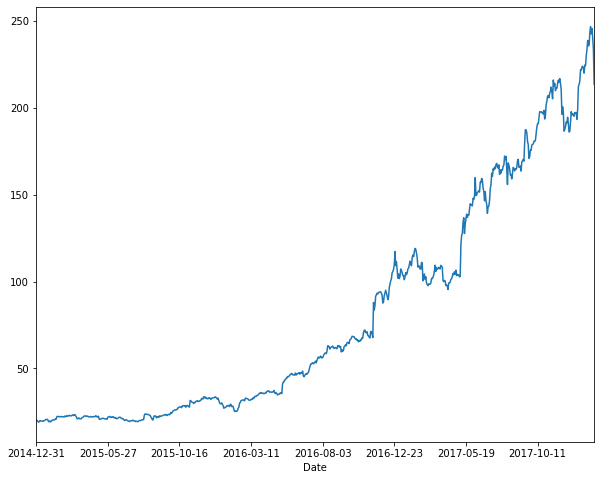

In [37]:
plt.figure(figsize=(10, 8))
fb['Close'].plot()
plt.show()

## <center>Generate new variables in DatFrame</center>

We can use lists of names by putting all names in a square bracket, and give this names list an entry to over 10 multiple columns:

In [38]:
fb[['Open', 'Close']]

,Open,Close
Date,,
2014-12-31,20.400000,20.049999
2015-01-02,20.129999,20.129999
2015-01-05,20.129999,19.790001
2015-01-06,19.820000,19.190001
2015-01-07,19.330000,19.139999
...,...,...
2018-01-30,241.110001,242.720001
2018-01-31,245.770004,245.800003
2018-02-01,238.520004,240.500000


If we want to create a new column called `Price1` which is Close price of tomorrow, you can do this: 

In [39]:
fb['Price1'] = fb['Close'].shift(-1)

The fb now has a new column. What is the right side of this code? Basically,it is `Close` price, but with shift operator, `shift(-1)`, we move a whole column of Close price one row upward. Then at each row or trading day, the price in the Price1 column is the Close price of tomorrow. It shifts a whole column upwards by one row.

Next, we create a new variable called `PriceDiff` which is the price change between tomorrow and today, which is a term we will try to predict later. A good thing to work with DataFrame is that we can compute them column-wisely. We do not need to compute a price difference one day by one day. Instead, we can take this job nicely with only one line of code. It is very intuitive and clean. That is why a lot of practitioners like to use Python to pre-process data. 

In [40]:
#Create a new column PriceDiff in the DataFrame fb
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']

In [41]:
#Run this code to display the price difference of Microsoft on 2015-01-05
print(fb['PriceDiff'].loc['2015-01-05'])

-0.6000000000000014


We can check the updated DataFrame fb, the new column is generated. Similarly, we can calculate the daily return. We know daily return should be PriceDiff divided by Close, as we can see from the formula. We double check if the new variable is created.

Next, we create a new variable direction. The direction is determined by `PriceDiff`. If `PriceDiff` is positive, the direction is up and denoted as one. Otherwise, it's down and denoted as negative one. We cannot use column-wise transformation of any columns to get "direction". Instead, we will use List comprehension. List comprehension is a very important tool for creation of new variables following very complicated rules. 

In [42]:
# Create a new column Direction. 
# The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
# for every record in the DataFrame - fb

fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]

In [43]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', fb['PriceDiff'].loc['2015-01-05'], fb['Direction'].loc['2015-01-05']))

Price difference on 2015-01-05 is -0.6000000000000014. direction is 0


A Moving average is a widely used signal in stock trading, which is loading average price over a defined number of days. Random fluctuations are very common in stock price. Taking an average price in a period can smooth out noise. It is sought to be good to find the trend. For example, we want to calculate the moving average of close price over three days, which is the average of Close price of today, yesterday, and the day before yesterday.

Let us take a close look, what is a shift(1):

In [44]:
fb['Close'].shift(1).head()

Date
2014-12-31          NaN
2015-01-02    20.049999
2015-01-05    20.129999
2015-01-06    19.790001
2015-01-07    19.190001
Name: Close, dtype: float64

Shift(1) is to shift the whole column downward by one row. Hence, at any given row or day, the shifted Close price in fact is a Close price of yesterday.

What is shift(2)?

In [45]:
fb['Close'].shift(2).head()

Date
2014-12-31          NaN
2015-01-02          NaN
2015-01-05    20.049999
2015-01-06    20.129999
2015-01-07    19.790001
Name: Close, dtype: float64

It shifts the column of Close price downward by two rows, which get the Close price two days ago. We found NaN at the top which means Not a Number. Since we do not have data before December 31, we get NaN in the top two rows if we move the columns downward by two rows. If a new variable is created using shift Close price that we also has NaN values at the top two rows.

In DataFrame, it has building method to compute moving average over any number of days. Here, we create two new columns or variables. `MA40` is a moving average Close price over 40 days, and `MA200` is a moving average price over 200 days. Rolling is a very nice method to provide us rolling window calculation. We can use this rolling window to calculate mean even sum. 

In [50]:
fb['MA40'] = fb['Close'].rolling(40).mean() # fast signal
fb['MA200'] = fb['Close'].rolling(200).mean() # slow signal

 Now, let us plot these moving averages and compare them with Close price. We first plot Close price then moving average 40. And finally, moving average 200. You can see those moving average smooth the original Close price. Moving average 40 which is colored as blue is more closely associated with Close price than moving average 200. Hence, we call moving average 40 is a fast signal and MA200 is a slow signal which reflects the price over a long history. If MA40 is above MA200, some traders who we call trend-following traders, they believe the stock price will move upwards for a while.

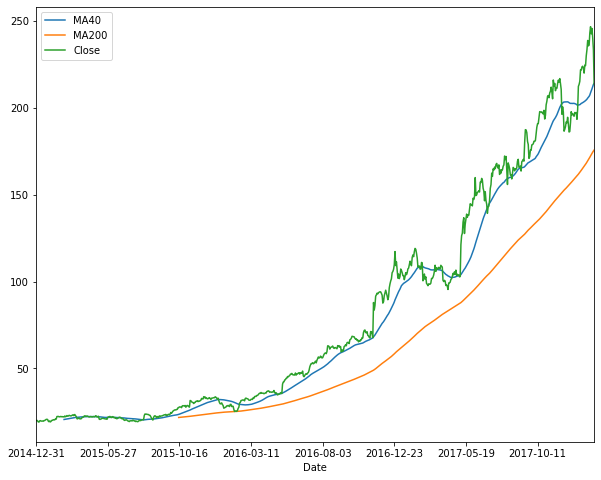

In [51]:
#plot the moving average
plt.figure(figsize=(10, 8))
fb['MA40'].plot(label='MA40')
fb['MA200'].plot(label='MA200')
fb['Close'].plot(label='Close')
plt.legend()
plt.show()

## <center>Building a Simple Trading Strategy</center>

In this part, we will build a simple strategy of stock trading. The target of this, is not to teach you how to make money by trading stock. As mentioned before, Moving Average of short period is more closely associated with recent change of stock price, which we call **Fast Signal**. Moving Average over long period reflects the price change over long-term history, which we call **slow signal**. We create MA10 and MA50, which are fast signal and slow signal respectively. Then, we plot close price MA10 and MA50. If MA10 is larger than MA50, the stock price is believed by some traders, that it goes up in the next several days. Otherwise, the price will decrease. Our strategy is, if MA10 is larger than MA50, we will buy and hold one share of stock. Alternately speaking, we will long one share of stock. T

In [52]:
# Add two columns - MA10 and MA50
# Use dropna to remove any "Not a Number" data
fb['MA10'] = fb['Close'].rolling(10).mean() # fast signal
fb['MA50'] = fb['Close'].rolling(50).mean() # slow signal
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Direction,MA40,MA200,MA10,MA50
Date,,,,,,,,,,,,,
2015-10-15,27.410000,27.990000,27.129999,27.430000,26.961004,13151200,27.860001,0.430001,1,23.54000,21.77235,26.177,23.4542
2015-10-16,27.520000,28.120001,27.450001,27.860001,27.383654,11209900,27.809999,-0.050002,0,23.68250,21.81140,26.483,23.6024
2015-10-19,27.950001,28.080000,27.490000,27.809999,27.334509,7367800,27.770000,-0.039999,0,23.84100,21.84980,26.722,23.6990
2015-10-20,27.690001,27.900000,27.480000,27.770000,27.295193,6610700,27.410000,-0.360000,0,24.01750,21.88970,26.924,23.7788
2015-10-21,27.940001,28.110001,27.360001,27.410000,26.941347,9657000,28.400000,0.990000,1,24.19575,21.93080,27.063,23.8538


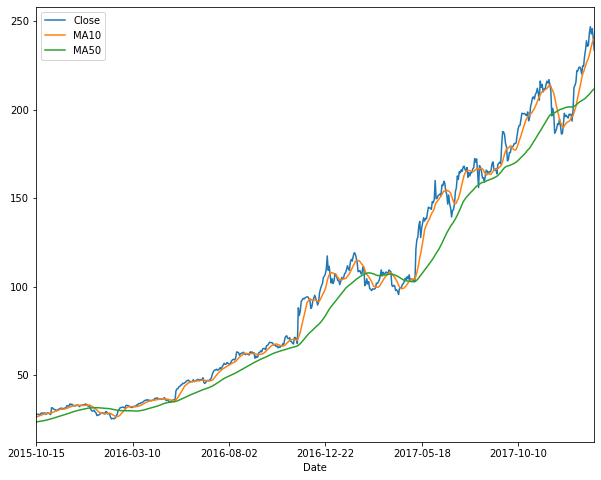

In [54]:
# Plot the stock price with two moving averages
plt.figure(figsize=(10, 8))
fb['Close'].plot(legend=True)
fb['MA10'].plot(legend=True) # fast signal
fb['MA50'].plot(legend=True) # slow signal
plt.show()

We can create a new variable called shares, to denote whether we long or not. It is created using list comprehension. Shares is equal to 1 if MA10 is larger than MA50, otherwise it is zero. 

In [55]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

Next, we will compute daily profit. First, we create variable Close1, which is the close price of tomorrow. Then, we'll create a new variable called Profit, which indeed is the daily profit. If shares is equal to one, the daily profit is equal to the close price of tomorrow minus close price of today. It can be positive or negative. If negative, we lose money on that day. If shares is equal to 0, it means we do not have stock at hand, the profit is equal to zero. We can plot the profit and find out on some days we make money, on other days we lose money. We can compute the cumulative wealth.

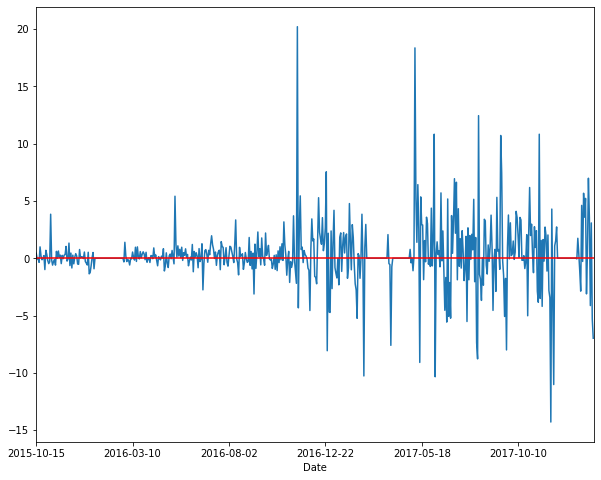

In [58]:
# Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
# tomorrow - the close price of today. Otherwise the profit is 0.
fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]

# Plot a graph to show the Profit/Loss
plt.figure(figsize=(10, 8))
fb['Profit'].plot()
plt.axhline(y=0, color='red')

We use DataFrame method, Cumsum to compute cumulative sum and create a new variable Wealth. Then, we check tail part of DataFrame, and check whether we make money or lose money. 

In [59]:
# Calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,Price1,PriceDiff,Direction,MA40,MA200,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,,,,,,
2018-01-29,242.740005,248.110001,240.610001,246.850006,246.850006,11377900,242.720001,-4.130005,0,208.813000,172.41680,233.431003,209.375201,1,242.720001,-4.130005,176.480010
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,245.800003,3.080002,1,209.863250,173.15295,235.692003,210.030001,1,245.800003,3.080002,179.560012
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,240.500000,-5.300003,0,211.066251,173.88580,237.800003,210.713801,1,240.500000,-5.300003,174.260009
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,233.520004,-6.979996,0,212.412250,174.59185,239.406003,211.296601,1,233.520004,-6.979996,167.280013
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,213.699997,-19.820007,0,213.556750,175.26105,239.747003,211.685401,1,NaN,NaN,NaN


Overall, this strategy makes about $167. In the last row, the profit and the wealth have `NaN` values, because those returns are computed from Close1, and Close1 is calculated using shift(-1). So, to get a terminal wealth using loc, the index level should be ms.index[-2]. Then, we print out wealth, which in fact is a sum of profit. To realize this profit, we need to buy one share of stock initially. So, our initial investment is a stock price on the first day. 

Text(0.5, 1.0, 'Total money you win is 167.28001300000003')

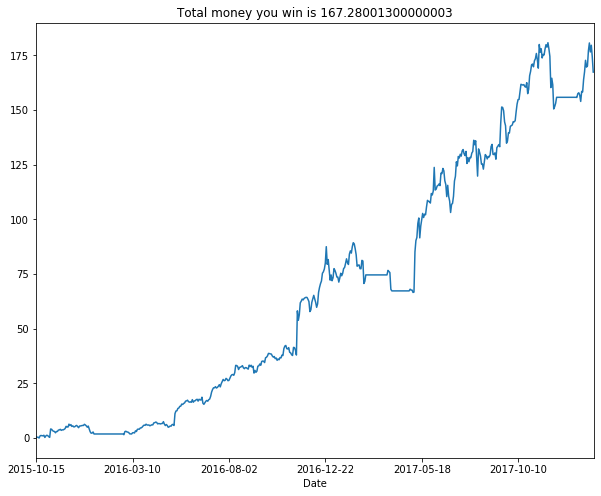

In [61]:
#plot the wealth to show the growth of profit over the period
plt.figure(figsize=(10, 8))
fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

This strategy seems to be very promising, but there are lots of questions if you want to implement it in real market. Can we find a better signal for trading? How do you evaluate your performance of shared strategy correctly?